# Goal

The goal is to analyise the [titanic](https://www.kaggle.com/c/titanic/data) data set to answer 3 questions:  
1- does gender affect survival rate?  
2- does ticket class affect survival rate?  
3- does having parent/childe affect survival rate?  
finally you can use the trained model to predict wethier you will survive or not.

# imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score

## Cleaning (dealing with NaNs)

In [321]:
df= pd.read_csv('titanic/train.csv')
#quick look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

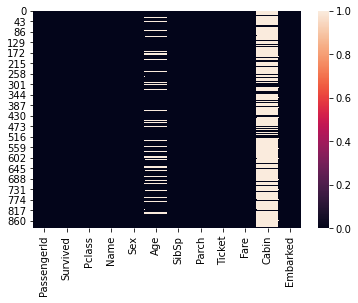

In [41]:
#check for null values
sns.heatmap(df.isnull())

In [45]:
#get % of nulls
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [38]:
#Try to impute the age column
#age based on Sex
df['Age'].groupby(df['Sex']).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [53]:
#age based on Sex and Pclass
df['Age'].groupby([df['Sex'], df['Pclass']]).mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [85]:
#Since the second approch gices as more verity we will go with it
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [82]:
#fill missing values
def fill_age(col):
    """
    input- dataframe with 3 columns in order (Sex, Pclass, Age)
    ------------------
    output- return the average age based on Pclass and Sex
    """
    aa={'male': {1: 41.0, 2: 31.0, 3: 27.0},
         'female': {1: 35.0, 2: 29.0, 3: 22.0}}
    if pd.isnull(col[2]):
        return aa[col[0]][col[1]]
    else:
        return col[2]
    
df['Age']= df[['Sex','Pclass', 'Age']].apply(fill_age, axis=1)

In [102]:
#drop Cabin because 77% is null and there is no meaningful way ti fill it
df.drop('Cabin', inplace=True, axis=1)

<AxesSubplot:xlabel='Pclass,Embarked'>

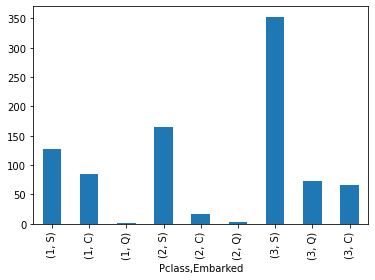

In [112]:
#find which port is the most used
#C = Cherbourg, Q = Queenstown, S = Southampton
df['Embarked'].groupby(df['Pclass']).value_counts().plot(kind='bar')

In [118]:
#since missing values are less than 1% and Southampton is the most frequent port
#fill missing values with S
df['Embarked'].fillna('S', inplace=True)

<AxesSubplot:>

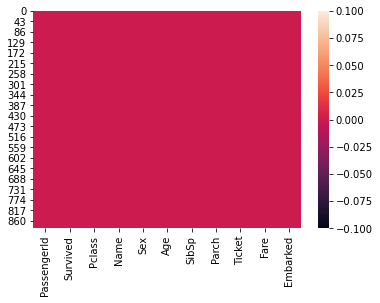

In [119]:
#check again
sns.heatmap(df.isnull())

## Exploration/answer questions

## Part I:which gender survive more?

C:\Users\Me\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

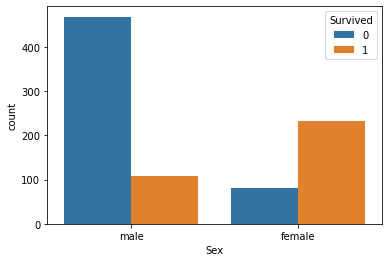

In [144]:
#survive count based on gender
sns.countplot(df['Sex'], hue=df['Survived'])
plt.legend(loc='upper right')

This graph shows that women are more likly to survive than men.

In [161]:
df[df['Survived']==1].groupby(df['Sex']).count()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [160]:
df[df['Survived']==0].groupby(df['Sex']).count()['Survived']

Sex
female     81
male      468
Name: Survived, dtype: int64

## Part II: does pclass affect survival rate

C:\Users\Me\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


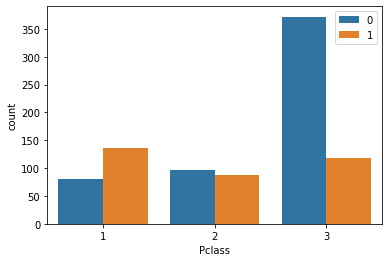

In [162]:
#survival count based on ticket class
sns.countplot(df['Pclass'], hue=df['Survived'])
plt.legend(loc='upper right')

we can clearly see that survival rate for 1st class is higher than other classes.  
lets see the survival rate for each gender per class.

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

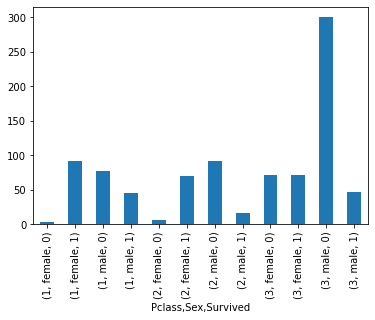

In [217]:
#maybe gender plays a role here more than pclass
df.groupby([df['Pclass'],df['Sex'], df['Survived']]).count()['PassengerId'].plot(kind='bar')

looks like that women in first class are the one with most survival rate while men don't benfit from the higher class

In [215]:
df.groupby([df['Pclass'],df['Sex'], df['Survived']]).count()['PassengerId']/len(df)

Pclass  Sex     Survived
1       female  0           0.003367
                1           0.102132
        male    0           0.086420
                1           0.050505
2       female  0           0.006734
                1           0.078563
        male    0           0.102132
                1           0.019080
3       female  0           0.080808
                1           0.080808
        male    0           0.336700
                1           0.052750
Name: PassengerId, dtype: float64

In [129]:
#num of passenger per class
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Part III:does parents/children affect survival rate

C:\Users\Me\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


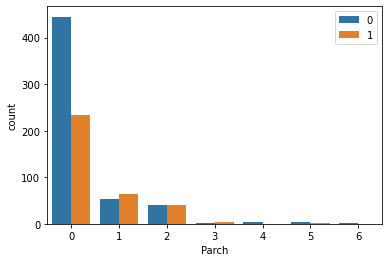

In [141]:
#survival count per number of parents/children
sns.countplot(df['Parch'], hue=df['Survived'])
plt.legend(loc='upper right')

form this we can see that being single has the highest survival rate and also the higeghst death count.  
meanwhile having one parent/child with has higher chances of surviving than dying.  
lets devide by gender to see if we can find something.

<AxesSubplot:xlabel='Parch,Sex,Survived'>

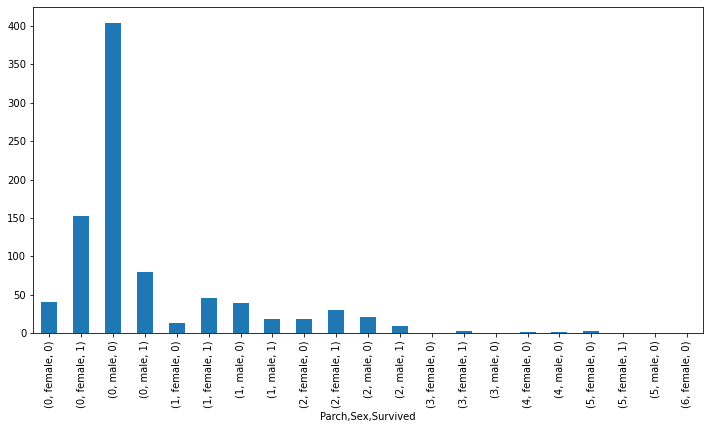

In [341]:
#with gender
plt.figure(figsize=(12, 6))
df.groupby([df['Parch'], df['Sex'], df['Survived']]).count()['PassengerId'].plot(kind='bar')

if we look at sheer count only it looks like that being single increases chanses of surviving but in reality it doesn't affect the survival rate.  


## ML Model

## Part IV: Let's see if we will survive

In [218]:
#prepare data for ML
#drop passengerId
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

#extract title from name 1= Mr, 2= Mrs, 3= Miss, 0= no title
df['Name']= df['Name'].apply(lambda x : 1 if 'Mr.' in x else(2 if 'Mrs.' in x else (3 if 'Miss.' in x else 0)) )

#make dummies for Sex and Embarked
dum= pd.get_dummies(df[['Sex', 'Embarked']], drop_first=True)
#drop orignal columns
df.drop('Sex', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)
#merge
df= pd.concat([df, dum], axis=1)

#normilaze the data
from sklearn.preprocessing import MinMaxScaler

#spit data
x= df.drop('Survived', axis=1)
y= df['Survived']

#scale x
scaler=MinMaxScaler()
x= scaler.fit_transform(x)

#import model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x, y)

## Part IV.II: evalute

In [250]:
#import test(features) data and prepare it
df_test= pd.read_csv('titanic/test.csv')

#fill missing values
def fill_age(col):
    """
    input- dataframe with 3 columns in order (Sex, Pclass, Age)
    ------------------
    output- return the average age based on Pclass and Sex
    """
    aa={'male': {1: 41.0, 2: 31.0, 3: 27.0},
         'female': {1: 35.0, 2: 29.0, 3: 22.0}}
    if pd.isnull(col[2]):
        return aa[col[0]][col[1]]
    else:
        return col[2]
    
df_test['Age']= df_test[['Sex','Pclass', 'Age']].apply(fill_age, axis=1)

In [258]:
#get mean manually
df_test['Fare'].groupby(df_test['Pclass']).mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [263]:
#fill with class 3 average fare
df_test.loc[152, 'Fare']=12.459678

In [266]:
#fill emarked with S
df_test['Embarked'].fillna('S', inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)

In [278]:
df_test['Name']= df_test['Name'].apply(lambda x : 1 if 'Mr.' in x else(2 if 'Mrs.' in x else (3 if 'Miss.' in x else 0)) )

#make dummies for Sex and Embarked
dum= pd.get_dummies(df_test[['Sex', 'Embarked']], drop_first=True)

#drop orignal columns
df_test.drop('Sex', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

#merge
df_test= pd.concat([df_test, dum], axis=1)

In [280]:
#import test labels
y_test= pd.read_csv('titanic/gender_submission.csv')
y_test.drop('PassengerId', axis=1, inplace=True)

In [282]:
x_test= scaler.transform(df_test)
y_pred= model.predict(x_test)

In [289]:
#evalutae
print('classification_report:')
print(classification_report(y_test, y_pred))
print('#######################################################')
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print('#######################################################')
print('r2_score:')
print(r2_score(y_test, y_pred))

classification_report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       266
           1       0.94      0.93      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

#######################################################
confusion_matrix:
[[257   9]
 [ 10 142]]
#######################################################
r2_score:
0.8035714285714286


## Part IV.III: Will you survive?

In [315]:
#lets predict if we die or not
#Order: 
#ticket class(1, 2, 3)
#Name(0= None, 1=Mr ,2=Mrs ,3=Miss)
#Age (number)
#number of siplings/ spouse (number)
#number of parents/ children (number)
#fare (number)
#male (0=no, 1=yes)
#embarked from Queenstown (0=no, 1=yes)
#embarked from Southampton (0=no, 1=yes)
#if both Queenstown and Southhampton are 0 then you will embark from Cherbourg
me= np.array([1, 0, 26.0, 0, 0, 100.0, 1, 0, 1])
me= scaler.transform(me.reshape(1, -1))
pred= model.predict(me)

In [318]:
#sad really
print(pred)

[0]
